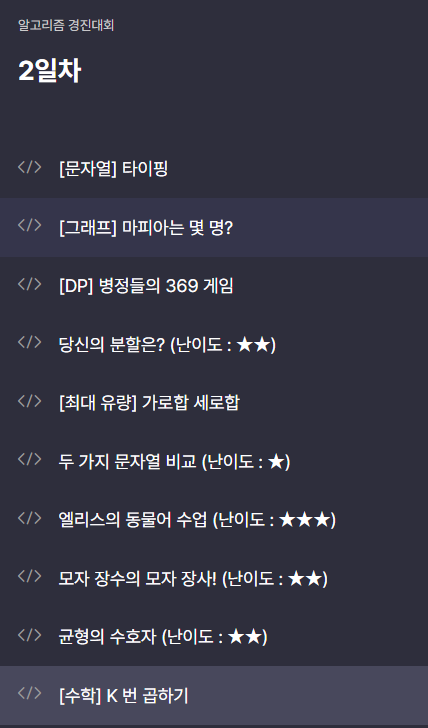

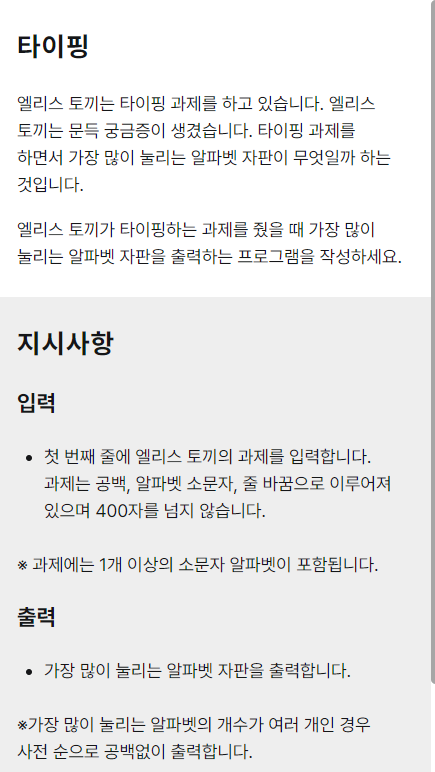

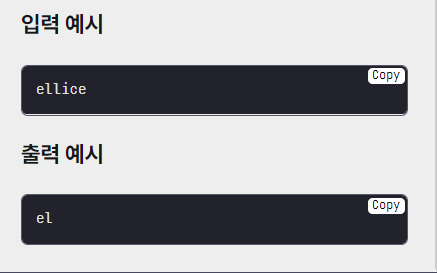

# EX01 (문자열)

- Counter 모듈 선언
- 입력값을 dict형으로 바꾸기
- values만 추출
- max값을 찾기위해 정렬(sorted())
- dict를 돌면서 value값이 max값과 동일하면 리스트에 추가
- 사전순으로 출력해야하므로 재 정렬

In [4]:
from collections import Counter

rabbit = input().strip()
dic = dict(Counter(rabbit))

values = [i for i in dic.values()]
values = sorted(values, reverse=True)

Max = values[0]

res = [i for i, k in dic.items() if Max == k]
res = ''.join(sorted(res))
print(res)


sesek
es


In [ ]:
import sys
# 길이 결과값을 저장할 리스트
li = [0]*26

# sys.stdin.read()를 통해 입력을 eof 날 때 까지 받을 수 있다.
# 또한 try, except를 이용하여, 입력을 eof 날 때 까지 받을 수 있다.
s = sys.stdin.read().replace('\n', '').replace(' ','')

# li 리스트의 0번 인덱스(a)부터 해당 문자가 존재한다면 1씩 추가해준다.
for i in s:
    li[ord(i)-97] += 1


for j in range(26):
    # 만약 리스트의 인덱스가 최댓값과 같다면(최댓값이 여러개라면)
    if li[j] == max(li):
        # 문자를 알파벳 순서에 따라 출력한다.
        print(chr(97+j), end ='')

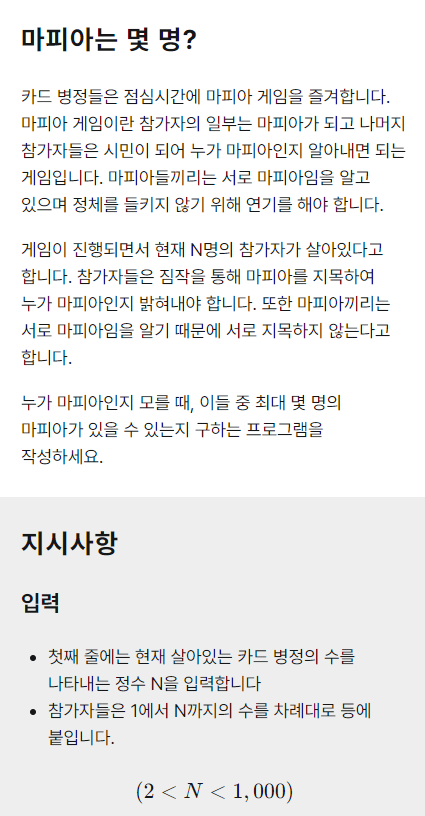

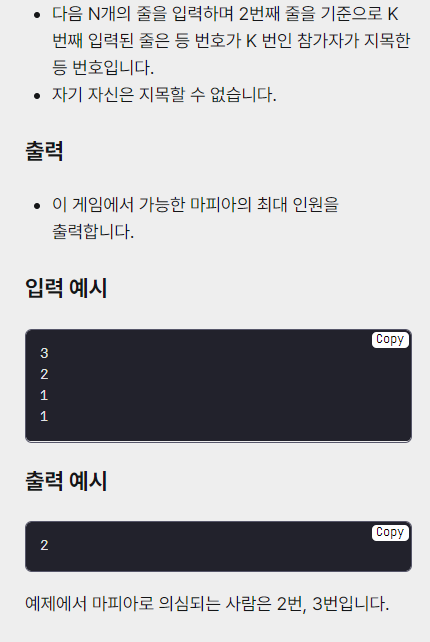

# EX02 (그래프, 탐욕, DFS, BFS)
- https://nahwasa.com/m/entry/%EB%B0%B1%EC%A4%80-10542-%EC%9E%90%EB%B0%94-%EB%A7%88%ED%94%BC%EC%95%84-%EA%B2%8C%EC%9E%84-BOJ-10542-JAVA
## 1. 문제

- N명의 사람들이 마피아 게임을 진행한다.
- 각 사람들이 마피아일것 같은 사람을 투표하게 되는데, 시민은 자신을 제외한 다른 사람 아무나 투표하고, 마피아는 시민 중 한 명에게 투표한다.
- 마피아일 수 있는 사람 수의 최대값을 출력하라.

## 2. 힌트
- 문제 자체만으로 풀기에는 너무 까다로우니, 일단 유향 그래프로 문제 상황을 정리해서 생각해 보자.
- a가 b에게 투표했으면 a->b로 나타내는 방식으로 하면 문제 상황을 쉽게 정리할 수 있을 것이다.
- 사실 유향 그래프가 아니라 무향 그래프로도 충분히 문제를 해결할 수 있다.
- a가 b에게 투표를 했건, b가 a에게 투표를 했건 두 사람이 동시에 마피아일 수는 없기 때문이다.
- 이제 문제가 "그래프에서 이웃하지 않은 정점들을 고르는 최대 개수를 구하시오" 로 바뀌었다.
- 만약 트리가 1-2-3 처럼 한 줄로 되어 있고, 1번, 2번 노드가 단말 노드라면 2번 노드를 고르는 것 보다는 1번 노드를 고르는 것이 반드시 최적이다.

In [ ]:
#include <bits/stdc++.h>

using namespace std;
typedef long long ll;

vector<int> visited;
vector<vector<int>> v;

int dfs(int node, int x) {
    visited[node] = 1;
    for (int i=0; i<v[node].size(); i++) {
        if (visited[v[node][i]])    continue;
        return dfs(v[node][i], x+1);
    }
    return x;
}

int main() {
    ios::sync_with_stdio(false);
    cin.tie(NULL);  cout.tie(NULL);
    int n;
    int a[500005];
    int cnt[500005];
    int ans = 0;
    memset(cnt, 0, sizeof(cnt));
    cin >> n;
    
    v = vector<vector<int>>(n+1);
    visited = vector<int>(n+1, 0);
    
    for (int i=1; i<=n; i++) {
        cin >> a[i];
        if (a[i] < i && a[a[i]] == i) {	// 서로가 서로를 지목한 경우;
            continue;
        }
        v[i].push_back(a[i]);
        v[a[i]].push_back(i);
        cnt[a[i]]++;	// 연결된 간선 개수
        cnt[i]++;
    }
    
    priority_queue<pair<int, int>, vector<pair<int, int>>, greater<pair<int, int>>> pq;
    for (int i=1; i<=n; i++) {
        pq.push({cnt[i], i});
    }
    
    while (!pq.empty()) {
        int sz = pq.top().first;
        int node = pq.top().second;
        pq.pop();
        if (visited[node])  continue;
        if (sz>1)  break;
        
        ans++;
        visited[node] = 1;
        for (int i=0; i<v[node].size(); i++) {
            int nnode = v[node][i];
            if (visited[nnode]) continue;
            visited[nnode] = 1;
            for (int j=0; j<v[nnode].size(); j++) {
                if (visited[v[nnode][j]])   continue;
                cnt[v[nnode][j]]--;
                pq.push({cnt[v[nnode][j]], v[nnode][j]});
            }
        }
    }
    
    for (int i=0; i<n; i++) {
        if (visited[i]) continue;
        ans += dfs(i, 1) / 2;
    }
    
    cout << ans;
}

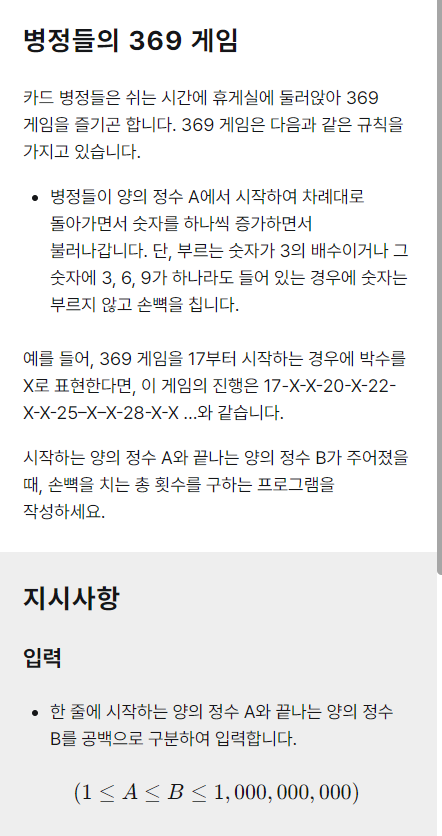

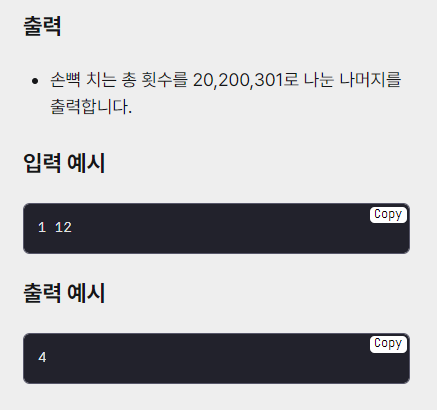

# EX03 (DP)
- https://velog.io/@eldpswp99/%EB%B0%B1%EC%A4%80-10802-369-%EA%B2%8C%EC%9E%84
- https://jeongboclass.tistory.com/71

In [ ]:
#include <iostream>
#include <string>
#define NMAX 100010
#define MOD 20200301
#define lint long long int
using namespace std;
 
string A, B;
 
lint num369[NMAX][10], tot369[NMAX];
lint mul3[NMAX][10][3], tot3[NMAX][3];
 
lint cntA, cntB;
 
// 거듭제곱
lint pow(lint val, int k) {
    if(k == 0) return 1;
    else if(k == 1) return val;
    else {
        if(k%2 == 0) return pow(( val*val )%MOD, k/2);
        else return ( val*pow(val*val%MOD, k/2) )%MOD;
    }
}
 
// 박수 횟수 구하기
lint get(string num) {
    lint ret, len;
 
    ret = 0;
    len = num.length();
 
    // 3, 6, 9가 포함된 숫자 카운트
    // Ex. 4237 >> (0000~3999) + (4000~4199) + (4200~4229) + (4230~4237)
    for(int idx=0, l=len;idx<len;idx++, l--) {
 
        // 예시: 4237
        // 현재 자릿수 이전 자릿수까지 박수 카운트 >> 000~999
        if(num[idx] > '0') ret = (ret + tot369[l-1]%MOD);
 
        // 현재 최대 자릿수 이전까지 박수 카운트 >> (1000~1999) + (2000~2999)
        int t = num[idx]-'0';
        for(int j=1;j<t;j++) ret = (ret + num369[l][j])%MOD;
 
 
        // 3, 6, 9가 포함된 경우, 남은 숫자 모조리 더하기
        if(num[idx] == '3' or num[idx] == '6' or num[idx] == '9') {
            // Ex. 3297에서 3000 카운트하기
            ret++;
 
            // 뒤에 있는 모든 숫자 더해서 결괏값에 반영
            lint t=0;
            for(int nxt =idx+1;nxt<len;nxt++) t = (t*10 + (num[nxt]-'0'))%MOD;
 
            ret = (ret + t)%MOD;
 
            // 탐색 종료
            break;
        }
    }
 
 
    // 3, 6, 9가 포함되지 않은 3의 배수 카운트
    int before=0;
    for(int idx=0, l=len;idx<len;idx++, l--) {
        // before: 이전까지 나온 숫자들의 합
        // m: 3의 배수를 만족하기 위해 필요한 값. Ex) before가 1일 때, m은 2
        int m = (3-before)%3;
 
        // 현재 자릿수 숫자가 0인 경우 스킵
        if(num[idx] == '0') {
            // 대신, 3의 배수이면서 10의 배수인 경우 카운트 Ex) 4200인 경우, 1 카운트
            if(m == 0 and idx+1 == len) ret++;
            else continue;
        }
 
        else {
            // 예시: 4237
            // 현재 숫자 이전 자릿수까지 카운트 >> 000~999
            ret = (ret + tot3[l-1][m])%MOD;
 
            // 현재 숫자 이전까지 카운트(단, 마지막 자리인 경우 끝까지 탐색)
            // Ex. 4237에서 현재 2인 경우) 4000~4199까지 탐색
            //     4237에서 현재 7인 경우) 0~7까지 모두 탐색
            int t = num[idx]-'0';
            if(idx+1 == len) t++;
 
            for(int j=1;j<t;j++) ret = (ret + mul3[l][j][m])%MOD;
 
            // 다음 탐색을 위한 갱신 및 점검
            before = (before+t)%3;
 
            // 현재 숫자가 3, 6, 9라면 조건(3, 6, 9를 포함하지 않는 3의 배수)를 만족하지 않기에 탐색 종료
            if(num[idx] == '3' or num[idx] == '6' or num[idx] == '9') break;
        }
    }
 
    return ret;
}
 
int check(string num) {
    // A가 박수쳐야 하는지 확인
    int f, tmp;
 
    f = tmp = 0;
    for(int i=0;i<num.length();i++) {
        if(num[i]=='3' or num[i]=='6' or num[i]=='9') {
            f = 1;
            break;
        }
        else tmp += (num[i]-'0');
    }
 
    if(f or tmp%3==0) return 1;
    else return 0;
}
 
int main() {
    // init
    ios::sync_with_stdio(false);
    cin.tie(0);
 
    // input
    cin >> A >> B;
 
    // 3, 6, 9가 포함된 숫자 구하기
    // num369[idx][j]: 자릿수가 idx이며, 맨 앞자리 숫자가 j일 때 박수치는 총 횟수
    tot369[1] = 3;
    num369[1][3] = num369[1][6] = num369[1][9] = 1;
    for(int idx=2;idx<=B.length();idx++) {
        for(int j= 0;j<=9;j++) {
            if(j>0 and j%3 == 0) num369[idx][j] = pow(10, idx-1);
            else num369[idx][j] = tot369[idx-1];
 
            tot369[idx] = (tot369[idx] + num369[idx][j])%MOD;
        }
    }
 
    // 3, 6, 9가 포함되지 않은 3의 배수 구하기
    // mul3[idx][j][k]: 자릿수가 idx이며, 맨 앞자리 숫자가 j이고, 3으로 나눴을 때 나머지가 k인 숫자의 개수
    tot3[0][0] = 1;
    for(int idx=1;idx<=B.length();idx++) {
        if(idx == 1) {
            for(int j=0;j<=9;j++) {
                if(j>0 and j%3 == 0) continue;
                else {
                    mul3[idx][j][j%3]++;
                    tot3[idx][j%3]++;
                }
            }
        }
 
        else {
            // 초깃값
            for(int k=0;k<3;k++) tot3[idx][k] = 0;
 
            for(int j=0;j<=9;j++) {
                // 3, 6, 9 제외
                if(j>0 and j%3 == 0) continue;
 
                for(int k=0;k< 3;k++) {
                    mul3[idx][j][k] = tot3[idx-1][(k-j + 12)%3];
 
                    tot3[idx][k] = (tot3[idx][k] + mul3[idx][j][k])%MOD;
                }
 
            }
        }
    }
 
    // A와 B까지 박수의 총합 구하기
    // check(num): num 숫자 확인하기
    // cntA: 0 ~ (A-1)까지 총 박수 횟수 / cntB: 1 ~ B까지 총 박수 횟수
    cntA = (get(A) - check(A) + MOD)%MOD;
    cntB = (get(B) + MOD)%MOD;
 
 
    cout << (cntB-cntA+MOD)%MOD;
 
}

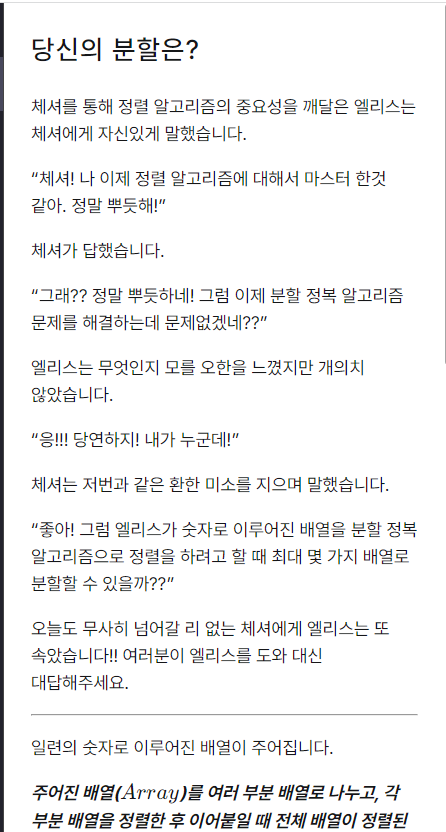

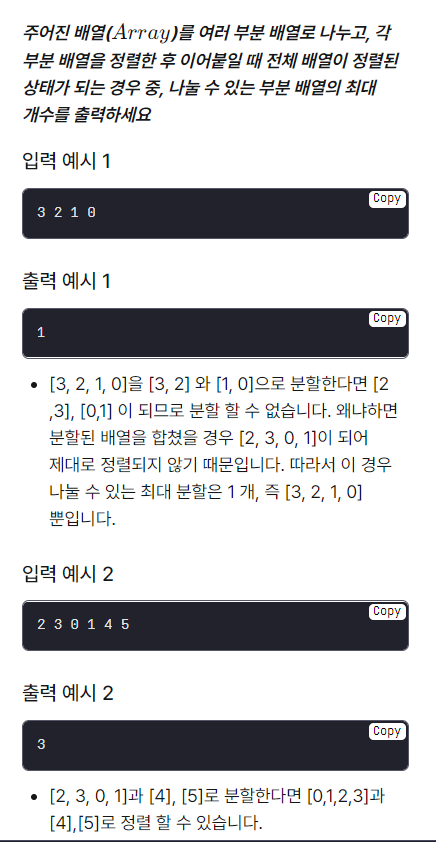

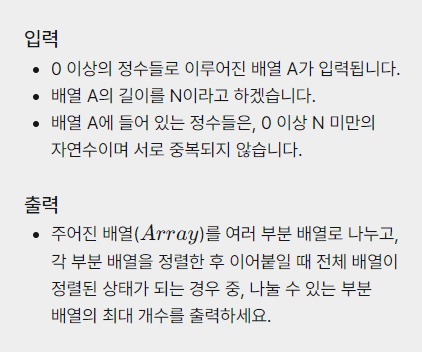

# EX04 (정렬)

In [7]:
arr = list(map(int, input().split()))

res = 0

index = 0
value = 0

for i in range(len(arr)):
    index+=i
    value+=arr[i]
    if index == value:
        res+=1
        
print(res)

3 2 1 0
1


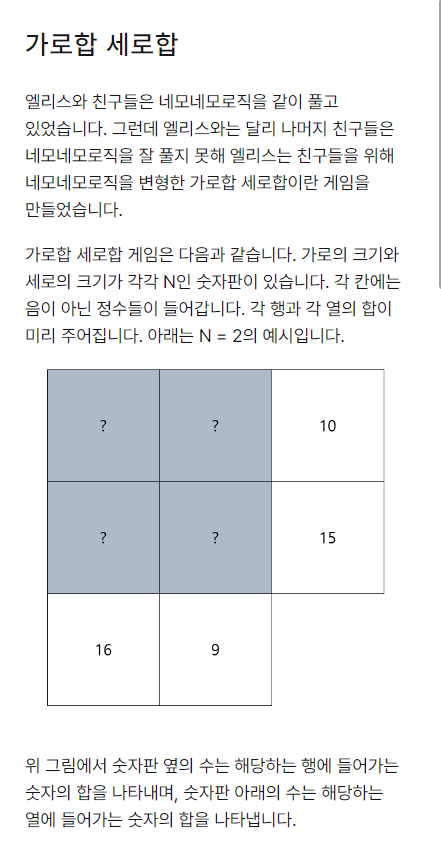

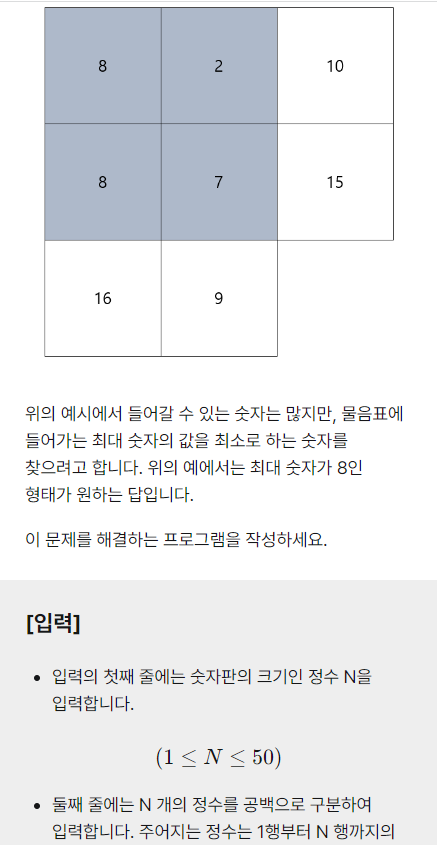

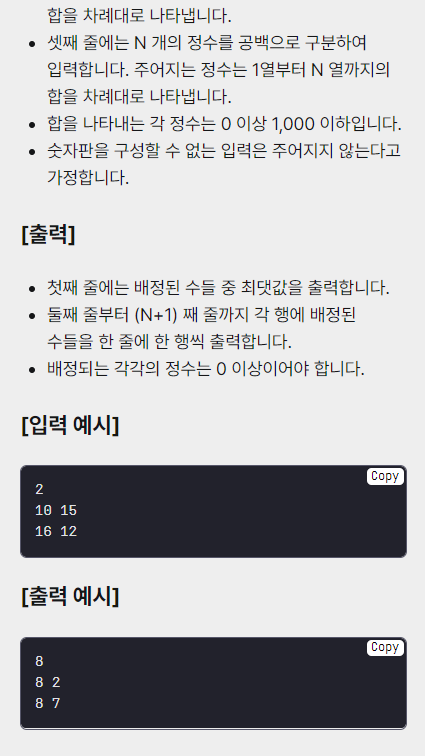

# EX05 (최대 유량)
- 모든 row col 값 더하기 max값 1000
- 이분탐색으로 1000이하의 최적의 max값 구하기

In [ ]:
#include <cstdio>
#include <vector>
#include <queue>
#include <algorithm>
#define MAX 104
#define INF 1000000000
using namespace std;

int Sum;
int Capacity[MAX][MAX], Flow[MAX][MAX];
vector<int> Line[MAX];

int MaxFlow(int Sour, int Sink) {
    int FlowSum = 0;
    while(true) {
        int Parent[MAX] = {};
        queue<int> Queue;
        Queue.push(Sour);
        Parent[Sour] = Sour;
        while(!Queue.empty() && !Parent[Sink]) {
            int Cur = Queue.front();
            Queue.pop();
            for(int i=0; i<Line[Cur].size(); i++) {
                int Next = Line[Cur][i];
                if(Capacity[Cur][Next] - Flow[Cur][Next] > 0 && !Parent[Next]) {
                    Queue.push(Next);
                    Parent[Next] = Cur;
                    if(Next == Sink) break;
                }
            }
        }
        if(!Parent[Sink]) break;

        int Amount = INF;
        for(int i=Sink; i!=Sour; i=Parent[i])
            Amount = min(Amount, Capacity[Parent[i]][i] - Flow[Parent[i]][i]);
        for(int i=Sink; i!=Sour; i=Parent[i]) {
            Flow[Parent[i]][i] += Amount;
            Flow[i][Parent[i]] -= Amount;
        }
        FlowSum += Amount;
    }
    return FlowSum;
}

int main() {
    int N;
    scanf("%d", &N);
    int Sour = 2*N+1, Sink = 2*N+2;
    for(int i=1; i<=N; i++) {
        Line[Sour].push_back(i), Line[i].push_back(Sour);
        scanf("%d", &Capacity[Sour][i]);
        Sum += Capacity[Sour][i];
    }
    for(int i=N+1; i<=2*N; i++) {
        Line[i].push_back(Sink), Line[Sink].push_back(i);
        scanf("%d", &Capacity[i][Sink]);
    }
    for(int i=1; i<=N; i++)
        for(int j=N+1; j<=2*N; j++)
            Line[i].push_back(j), Line[j].push_back(i);
    int Left = 0, Right = 10000, Mid, Ans;
    while(Left <= Right) {
        Mid = (Left + Right)/2;
        for(int i=1; i<=N; i++)
            for(int j=N+1; j<=2*N; j++) Capacity[i][j] = Mid;
        fill(&Flow[0][0], &Flow[MAX-1][MAX], 0);
        if(MaxFlow(Sour, Sink) == Sum) {
            Ans = Mid;
            Right = Mid-1;
        }
        else Left = Mid+1;
    }
    printf("%d\n", Ans);

    for(int i=1; i<=N; i++)
        for(int j=N+1; j<=2*N; j++) Capacity[i][j] = Ans;
    fill(&Flow[0][0], &Flow[MAX-1][MAX], 0);
    MaxFlow(Sour, Sink);
    for(int i=1; i<=N; i++) {
        for(int j=N+1; j<=2*N; j++) printf("%d ", Flow[i][j]);
        printf("\n");
    }
}

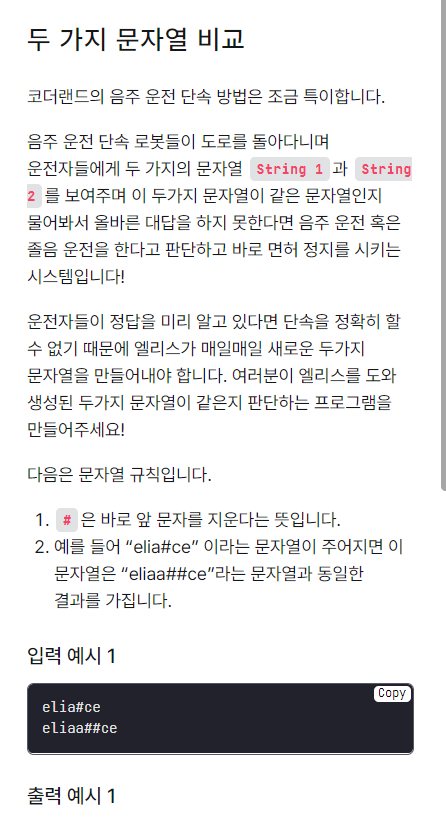

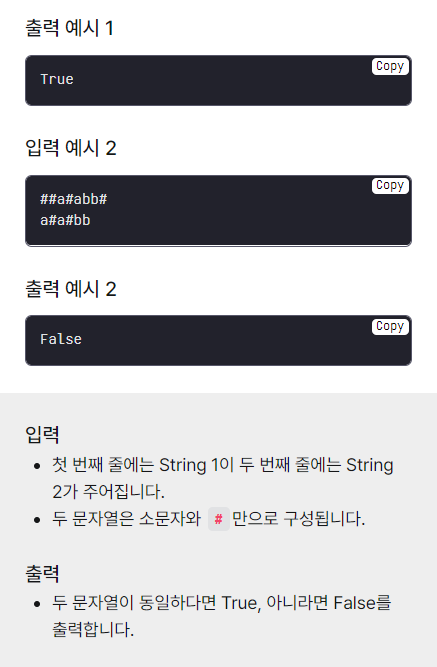

# EX06 (문자열처리)

In [ ]:
String1 = input()
String2 = input()

replace1 = ''
replace2 = ''

cnt = 0

for i in range(len(String1)-1,-1,-1):
    if String1[i] == '#':
        cnt += 1
    else:
        if cnt > 0:
            cnt-=1
            continue
        replace1 += String1[i]
        

cnt = 0

for i in range(len(String2)-1,-1,-1):
    if String2[i] == '#':
        cnt += 1
    else:
        if cnt > 0:
            cnt-=1
            continue
        replace2 += String2[i]
        

if replace1 == replace2:
    print('True')
else:
    print('False')

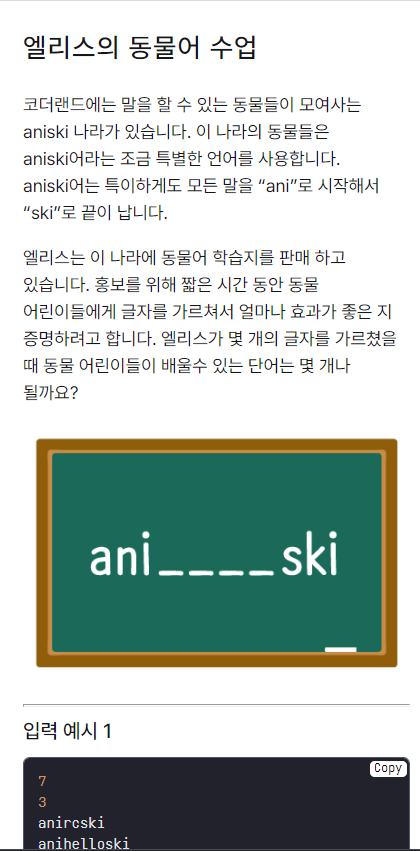

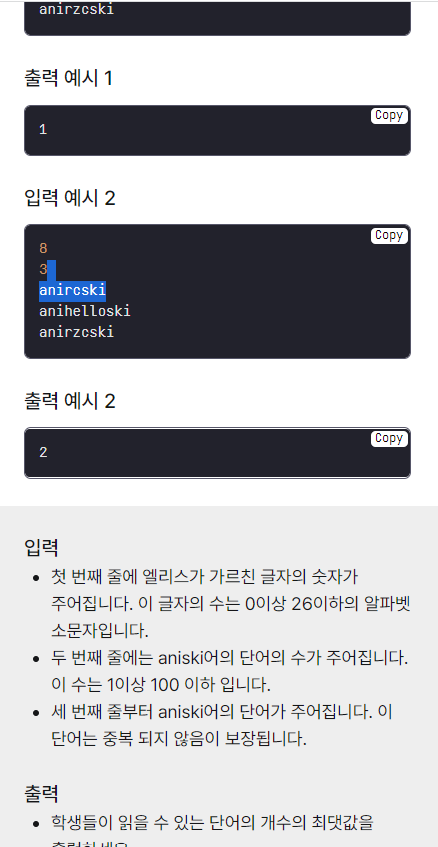

# EX07 (완전탐색)

In [10]:
num1 = int(input())
num2 = int(input())
Strs = []

for i in range(num2):
    Strs.append(input().replace('a','').replace('s','').replace('n','').replace('i','').replace('k',''))
num1-=5
Max = 0

def animal(Str):
    if len(Str) == num1:
        global Max
        cnt = 0
        for my_str in Strs:
            check = False
            for s in my_str:
                if s not in Str:
                    check = True
                    break
            if not check:
                cnt += 1
        Max = max(Max, cnt)
        
    elif len(Str) == 0:
        for i in range(ord('a'),ord('z')+1):
            if chr(i) == 'a' or chr(i) == 's' or chr(i) == 'n' or chr(i) == 'i' or chr(i) == 'k':
                continue
            animal(Str + chr(i))
    else:
        for i in range(ord(Str[-1])+1,ord('z')+1):
            if chr(i) == 'a' or chr(i) == 's' or chr(i) == 'n' or chr(i) == 'i' or chr(i) == 'k':
                continue
            animal(Str + chr(i))
            
if num1<0:
    print(0)
else:
    animal('')
    print(Max)

8
3
anircski
anihelloski
anirzcski
2


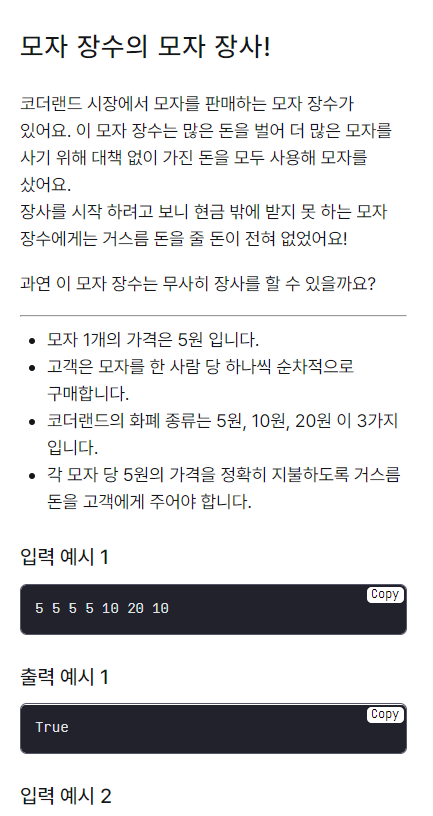

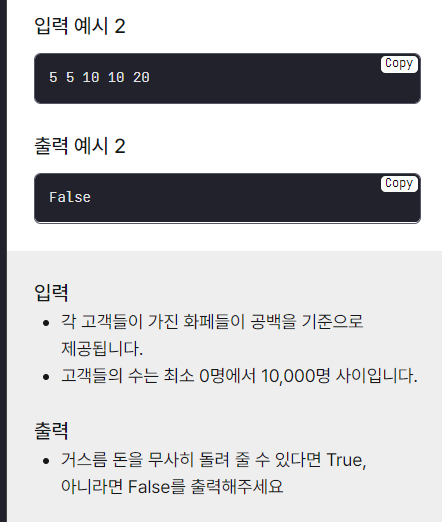

# EX08 (시뮬레이션)
- 5원 받으면 5원 +1
- 10원 받으면 5원 -1 10원 +1
- 20원 받으면 5원 -3 or 10원 -1 5원 -1
- 반복문, 거스름돈 줄 수 없으면 break - false

In [17]:
buy = list(map(int, input().split()))

five = 0
ten = 0

res = True

for change in buy:
    if change == 5:
        five += 1
    if change == 10:
        five -= 1
        if five <= 0:
            res = False
            break
        ten+=1
    if change == 20:
        if ten>0 and five>0:
            ten-=1
            five-=1
        elif five>=3:
            five-=3
        else:
            res = False
            break
print(res)

5 5 5 5 15
True


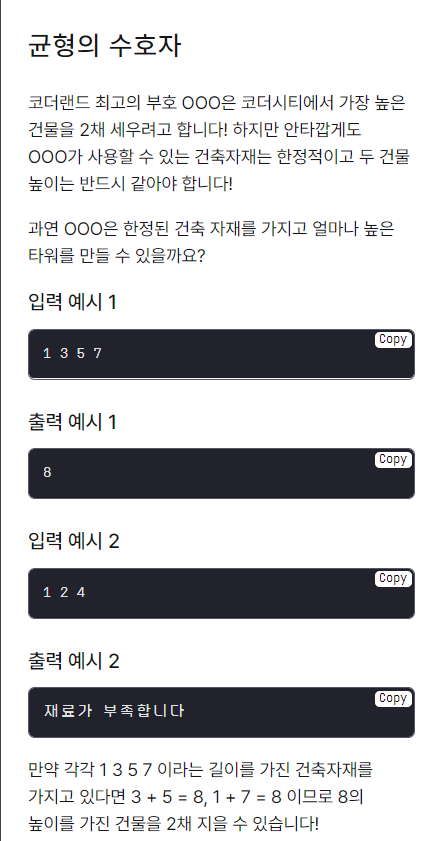

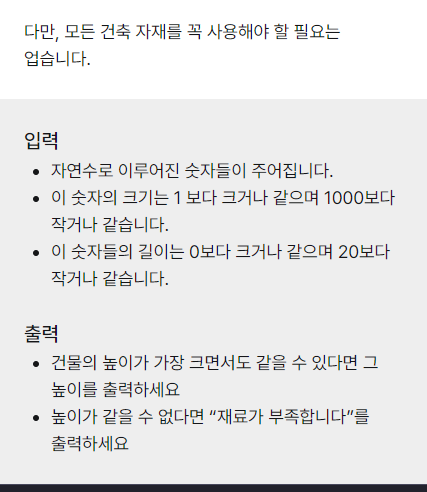

# EX09 (시뮬레이션 1일차 중복문제)

In [ ]:
height = list(map(int, input().split()))

def build(i, j, cnt):
    if i == j:
        global Max
        Max = max(Max, i)
    if cnt == len(height):
        return
    build(i + height[cnt], j, cnt+1)
    build(i, j + height[cnt], cnt+1)
    build(i, j, cnt+1)

Max = 0
build(0,0,0)

if Max == 0:
    print('재료가 부족합니다')
else:
    print(Max)


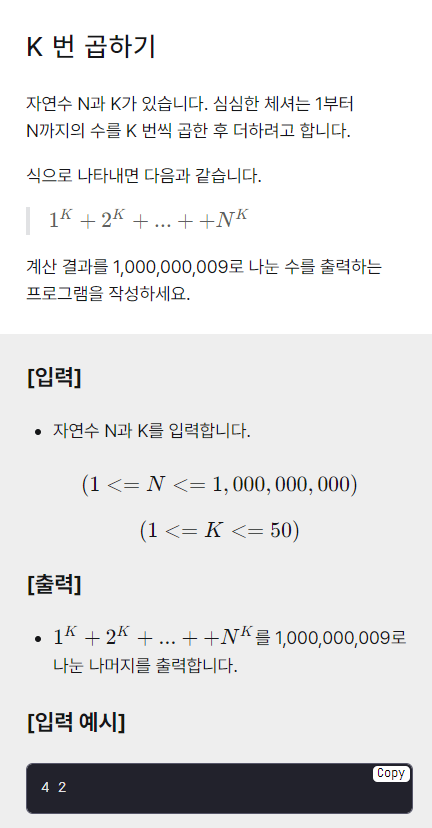

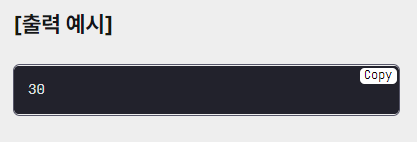

# EX10 (수학)
- 거듭제곱 만들기
- 1 ~ N 까지 반복
- 더하는 함수 적용

In [24]:
N = int(input())
K = int(input())

def power(N, K):
    ans = 1
    for s in range(K):
        ans *= N
    
    return ans

def plus(N,K):
    plus1 = 0
    for i in range(N):
        res = power(i, K)
        plus1 +=res
    return plus1

print(plus(N,K))

3
3
9
